In [121]:
%%capture --no-stderr
%pip install -q langgraph

In [122]:
from typing_extensions import TypedDict

class StateSchema(TypedDict):
  message: str

In [123]:
obj = StateSchema(message="I am learning langgraph")
obj

{'message': 'I am learning langgraph'}

In [124]:
obj["message"] + " + langchain"

'I am learning langgraph + langchain'

In [125]:
type(obj)

dict

In [126]:
obj

{'message': 'I am learning langgraph'}

In [127]:
obj["message"] = obj["message"] + " + langchain"
obj

{'message': 'I am learning langgraph + langchain'}

#Nodes

In [128]:
def test_node(state: StateSchema):
  print("NODE 1 STATE:", state)
  return {"message": "I'm learning agentic ai development"}

test_node({"message": "I'm learning ai agent development"})

NODE 1 STATE: {'message': "I'm learning ai agent development"}


{'message': "I'm learning agentic ai development"}

In [129]:
def node_1(state: StateSchema) -> StateSchema:
  print("NODE 1 STATE:", state)
  return {"message": state["message"] + "  I am learning langgraph"}

def node_2(state: StateSchema) -> StateSchema:
  print("NODE 2 STATE:", state)
  return {"message": state["message"] + "  I am learning langchain"}

def node_3(state: StateSchema) -> StateSchema:
  print("NODE 3 STATE:", state)
  return {"message": state["message"] + "  I am learning python"}

In [130]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

builder = StateGraph(StateSchema)

builder.add_node("Node 1", node_1)
builder.add_node("Node 2", node_2)
builder.add_node("Node 3", node_3)

builder.add_edge(START, "Node 1")
builder.add_edge("Node 1", "Node 2")
builder.add_edge("Node 2", "Node 3")
builder.add_edge("Node 3", END)

graph: CompiledStateGraph = builder.compile()

In [131]:
type(builder)

langgraph.graph.state.StateGraph

In [132]:
type(graph)

langgraph.graph.state.CompiledStateGraph

In [133]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'Node 1': Node(id='Node 1', name='Node 1', data=Node 1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'Node 2': Node(id='Node 2', name='Node 2', data=Node 2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'Node 3': Node(id='Node 3', name='Node 3', data=Node 3(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='Node 1', target='Node 2', data=None, conditional=False), Edge(source='Node 2', target='Node 3', data=None, conditional=False), Edge(source='Node 3', target='__end__', data=None, conditional=False),

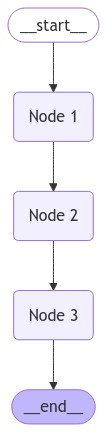

In [134]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [135]:
graph.invoke({"message": "Hello, I'm learning gen ai fundamentals"})

NODE 1 STATE: {'message': "Hello, I'm learning gen ai fundamentals"}
NODE 2 STATE: {'message': "Hello, I'm learning gen ai fundamentals  I am learning langgraph"}
NODE 3 STATE: {'message': "Hello, I'm learning gen ai fundamentals  I am learning langgraph  I am learning langchain"}


{'message': "Hello, I'm learning gen ai fundamentals  I am learning langgraph  I am learning langchain  I am learning python"}

#Now using gemini LLM in nodes in simple workflow

In [136]:
%pip install -q langchain langchain-google-genai

In [141]:
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(api_key=GEMINI_API_KEY, model="gemini-1.5-flash")

In [160]:
from langchain_core.messages import AIMessage

class LLMTestState(TypedDict):
  prompt: str
  output: str

def llm_node_1(state: LLMTestState) -> LLMTestState:
  print("Node 1 State --- ", state)
  prompt = state["prompt"]
  llm_response: AIMessage = llm.invoke(prompt)
  return {"output": llm_response.content}

def node_2(state: LLMTestState) -> LLMTestState:
  print("Node 2 State --- ", state)

In [161]:
builder = StateGraph(LLMTestState)

builder.add_node("LLM NODE", llm_node_1)
builder.add_node("NODE 2", node_2)

builder.add_edge(START, "LLM NODE")
builder.add_edge("LLM NODE", "NODE 2")
builder.add_edge("NODE 2", END)

graph: CompiledStateGraph = builder.compile()

In [162]:
graph.invoke({"prompt": "Why is the sky blue ?"})

Node 1 State ---  {'prompt': 'Why is the sky blue ?'}
Node 2 State ---  {'prompt': 'Why is the sky blue ?', 'output': "The sky appears blue due to a phenomenon called **Rayleigh scattering**. Here's how it works:\n\n* **Sunlight is made up of all colors of the rainbow.**  This is called the visible light spectrum.\n* **When sunlight enters the Earth's atmosphere, it interacts with the tiny molecules of air, like nitrogen and oxygen.**\n* **These molecules scatter the sunlight in all directions.** This is called scattering.\n* **Shorter wavelengths of light, like blue and violet, are scattered more effectively than longer wavelengths, like red and orange.**\n* **This means that more blue light is scattered towards our eyes from all directions in the sky.**\n* **Our eyes are more sensitive to blue light than violet, so we perceive the sky as blue.**\n\n**Here's a helpful analogy:**\n\nImagine shining a flashlight through a glass of water. The light scatters as it passes through the water

{'prompt': 'Why is the sky blue ?',
 'output': "The sky appears blue due to a phenomenon called **Rayleigh scattering**. Here's how it works:\n\n* **Sunlight is made up of all colors of the rainbow.**  This is called the visible light spectrum.\n* **When sunlight enters the Earth's atmosphere, it interacts with the tiny molecules of air, like nitrogen and oxygen.**\n* **These molecules scatter the sunlight in all directions.** This is called scattering.\n* **Shorter wavelengths of light, like blue and violet, are scattered more effectively than longer wavelengths, like red and orange.**\n* **This means that more blue light is scattered towards our eyes from all directions in the sky.**\n* **Our eyes are more sensitive to blue light than violet, so we perceive the sky as blue.**\n\n**Here's a helpful analogy:**\n\nImagine shining a flashlight through a glass of water. The light scatters as it passes through the water, and the shorter wavelengths (blue) are scattered more than the longer